Вместо Beautiful Soup использовать библиотеку LXML.

найти h2 теги с атрибутом align равным center
найти h2 теги у которых есть аттрибут align
извлечь текстовое содержимое тега с разметкой внутри
извлечь два первых параграфа с текстом из страницы на Википедии
извлечь список районов Дубны
извлечь таблицу климата
сохранить изображения

In [17]:
from lxml import etree
import requests
from lxml import html

In [95]:
url = "https://ru.wikipedia.org/wiki/Кольчугино"

tree = html.fromstring(requests.get(url).content)

In [52]:
from lxml import html
import requests

# URL страницы Википедии
url = "https://ru.wikipedia.org/wiki/Кольчугино"

# Загрузим HTML-код страницы
response = requests.get(url)
tree = html.fromstring(response.content)

# Преобразуем дерево в строку с отступами
tree_string = html.tostring(tree, pretty_print=True, encoding="utf-8")

# Выведем результат
print(f"Содержание дерева:\n{tree_string.decode('utf-8')}")

Содержание дерева:
<html class="client-nojs" lang="ru" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Кольчугино — Википедия</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","январь","февраль","март","апрель","май","июнь","июль","август","сентябрь","октябрь","ноябрь","декабрь"],"wgRequestId":"22ae57e7-49f1-49bc-b003-9a72e3628b26","wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Кольчугино","wgTitle":"Кольчугино","wgCurRevisionId":133960679,"wgRevisionId":133960679,"wgArticleId":71312,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Википедия:Cite web (не указан язык)","Википедия:Cite web (недоступные ссылки без архивной копии)",
"Википедия:Статьи со сложным входом в Модуль:URL","НП:Статус:Город","ПРО:Города:По

# Найти теги h2 с атрибутом выравнивания, равным центру

In [43]:
# Find h2 tags with alignment attribute equal to center
h2_align_center_tags = tree.xpath("//h2[@align='center']")
for tag in h2_align_center_tags:
    print(tag.text)

# Найти теги h2, которые имеют атрибут выравнивания

In [44]:
# Find h2 tags which have alignment attribute
h2_align_tags = tree.xpath('//h2[@align]')
for tag in h2_align_tags:
    print(tag.text)

In [45]:
h2_tags = tree.xpath('//h2')
for tag in h2_tags:
  print(tag.text)

Содержание
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
Навигация


# Извлекаем текстовое содержимое тега с разметкой внутри

In [46]:
for tag in h2_align_center_tags:
    print(tag.text)

In [47]:
for tag in h2_align_tags:
    print(tag.text)

# Извлекаем два первых параграфа с текстом из страницы на Википедии

In [65]:
# Извлекаем первые два тега <p>
paragraphs = tree.xpath('//p')[:2]

# Выводим содержимое тегов <p>
for paragraph in paragraphs:
    print(html.tostring(paragraph, pretty_print=True, encoding='unicode'))

<p><b>Кольчу́гино</b> — <a href="/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4" title="Город">город</a> (с <a href="/wiki/1931_%D0%B3%D0%BE%D0%B4" title="1931 год">1931 года</a><sup id="cite_ref-2" class="reference"><a href="#cite_note-2">[2]</a></sup>) во <a href="/wiki/%D0%92%D0%BB%D0%B0%D0%B4%D0%B8%D0%BC%D0%B8%D1%80%D1%81%D0%BA%D0%B0%D1%8F_%D0%BE%D0%B1%D0%BB%D0%B0%D1%81%D1%82%D1%8C" title="Владимирская область">Владимирской области</a> <a href="/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F" title="Россия">России</a>. Административный центр <a href="/wiki/%D0%9A%D0%BE%D0%BB%D1%8C%D1%87%D1%83%D0%B3%D0%B8%D0%BD%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D0%B0%D0%B9%D0%BE%D0%BD" title="Кольчугинский район">Кольчугинского района</a>. Образует городское поселение <a href="/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%BE%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9A%D0%BE%D0%BB%D1%8C%D1%87%D1%83%D0%B3%D0%B8%D0%BD%D0%BE" class="mw-redirect" title="Городское поселение Кольчугино">город К

In [68]:
import re

def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

for paragraph in paragraphs:
    text_content = html.tostring(paragraph, method='text', encoding='unicode')
    clean_text = remove_html_tags(text_content)
    print(clean_text)

Кольчу́гино — город (с 1931 года[2]) во Владимирской области России. Административный центр Кольчугинского района. Образует городское поселение город Кольчугино.


Расположен в северо-западной части Владимирской области, на реке Пекше (приток реки Клязьмы), в Юрьевском ополье, на отрогах Московской возвышенности, в 74 км от Владимира, в 131 км от Москвы (через Киржач), в 40 км от Александрова, в 30 км от Юрьева-Польского. Входит в Северо-Западный внутриобластной экономический район.




# Извлекаем мэра

In [79]:
table = tree.xpath("//tr/td/span/text()")[0]
print("Мэр:", table)

Мэр: Сверху вниз, слева направо: 


# Извлекаем таблицу численности населения

In [82]:
table_title = "Численность населения"
table = tree.xpath('//table[.//caption[contains(., "%s")]]' % table_title)[0]

# Вытягиваем строки
header = table.xpath('.//tr[1]/*')
hrows = table.xpath('.//tr[position() > 1]//th')
rows = table.xpath('.//tr[position() > 1]//td')
hr = []
h = []
r = []
for i in range(len(hrows)):
  hr.append(hrows[i].text_content().replace("\n",""))
print(hr)
for i in range(len(header)):
  h.append(header[i].text_content().replace("\n",""))
print(h)
for i in range(len(rows)-1):
  r.append(rows[i].text_content().replace("\n",""))
print(r)

['1996', '1998[11]', '2000[11]', '2001[11]', '2002[18]', '2003[11]', '2005[11]', '2006[11]', '2007[11]', '2008[11]', '2009[19]', '2010[20]', '2011[21]', '2012[22]', '2013[23]', '2014[24]', '2015[25]', '2016[26]', '2017[27]', '2018[28]', '2019[29]', '2020[30]', '2021[1]', '', '', '', '', '', '', '', '', '', '']
['1897[11]', '1923[12]', '1926[11]', '1931[11]', '1939[13]', '1959[14]', '1967[11]', '1970[15]', '1979[16]', '1989[17]', '1992[11]']
['1300', '↗5138', '↗11\xa0600', '↗22\xa0900', '↗29\xa0626', '↗37\xa0865', '↗40\xa0000', '↗41\xa0637', '↗43\xa0741', '↗45\xa0601', '↘45\xa0400', '↗46\xa0000', '↗46\xa0200', '→46\xa0200', '↗46\xa0300', '↗47\xa0059', '↗47\xa0100', '↘46\xa0500', '↘46\xa0300', '↘45\xa0900', '↘45\xa0700', '↘45\xa0628', '↗45\xa0776', '↘45\xa0653', '↘45\xa0225', '↘44\xa0786', '↘44\xa0405', '↘44\xa0125', '↘43\xa0784', '↘43\xa0543', '↘43\xa0089', '↘42\xa0708', '↘41\xa0953', '↘39\xa0410', '', '', '', '', '', '', '', '', '']


In [121]:
from lxml import html
import requests
import pandas as pd

url = 'https://ru.wikipedia.org/wiki/Кольчугино'
response = requests.get(url)


tree = html.fromstring(response.content)


table_title = "Численность населения"
table = tree.xpath('//table[.//caption[contains(., "%s")]]' % table_title)[0]

#table = tree.xpath('//table[@class="standard"]')[0]

rows = table.xpath('.//tr')


headers = [th.text_content().strip() for th in table.xpath('.//th')]
data = {header: [] for header in headers}

print(headers)

popilation = []


for row in rows:
    cells = row.xpath('.//td')
    for i, cell in enumerate(cells):
        popilation.append(cell.text_content())
        data[headers[i]].append(cell.text_content().strip())

print(popilation)

['1897[11]', '1923[12]', '1926[11]', '1931[11]', '1939[13]', '1959[14]', '1967[11]', '1970[15]', '1979[16]', '1989[17]', '1992[11]', '1996', '1998[11]', '2000[11]', '2001[11]', '2002[18]', '2003[11]', '2005[11]', '2006[11]', '2007[11]', '2008[11]', '2009[19]', '2010[20]', '2011[21]', '2012[22]', '2013[23]', '2014[24]', '2015[25]', '2016[26]', '2017[27]', '2018[28]', '2019[29]', '2020[30]', '2021[1]', '', '', '', '', '', '', '', '', '', '']
['1300', '↗5138', '↗11\xa0600', '↗22\xa0900', '↗29\xa0626', '↗37\xa0865', '↗40\xa0000', '↗41\xa0637', '↗43\xa0741', '↗45\xa0601', '↘45\xa0400', '↗46\xa0000', '↗46\xa0200', '→46\xa0200', '↗46\xa0300', '↗47\xa0059', '↗47\xa0100', '↘46\xa0500', '↘46\xa0300', '↘45\xa0900', '↘45\xa0700', '↘45\xa0628', '↗45\xa0776', '↘45\xa0653', '↘45\xa0225', '↘44\xa0786', '↘44\xa0405', '↘44\xa0125', '↘43\xa0784', '↘43\xa0543', '↘43\xa0089', '↘42\xa0708', '↘41\xa0953', '↘39\xa0410', '', '', '', '', '', '', '', '', '', '']


In [122]:
popilation

['1300',
 '↗5138',
 '↗11\xa0600',
 '↗22\xa0900',
 '↗29\xa0626',
 '↗37\xa0865',
 '↗40\xa0000',
 '↗41\xa0637',
 '↗43\xa0741',
 '↗45\xa0601',
 '↘45\xa0400',
 '↗46\xa0000',
 '↗46\xa0200',
 '→46\xa0200',
 '↗46\xa0300',
 '↗47\xa0059',
 '↗47\xa0100',
 '↘46\xa0500',
 '↘46\xa0300',
 '↘45\xa0900',
 '↘45\xa0700',
 '↘45\xa0628',
 '↗45\xa0776',
 '↘45\xa0653',
 '↘45\xa0225',
 '↘44\xa0786',
 '↘44\xa0405',
 '↘44\xa0125',
 '↘43\xa0784',
 '↘43\xa0543',
 '↘43\xa0089',
 '↘42\xa0708',
 '↘41\xa0953',
 '↘39\xa0410',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [135]:
translation_table = str.maketrans({'↗': '', '↘': '', '\xa0': '', '→': ''})
popilation = [item.translate(translation_table) for item in popilation]

len(popilation)
len(headers)

44

In [137]:
# Используем filter для удаления пустых значений
headers_clr = list(filter(lambda x: x != '', headers))
headers_clr

['1897[11]',
 '1923[12]',
 '1926[11]',
 '1931[11]',
 '1939[13]',
 '1959[14]',
 '1967[11]',
 '1970[15]',
 '1979[16]',
 '1989[17]',
 '1992[11]',
 '1996',
 '1998[11]',
 '2000[11]',
 '2001[11]',
 '2002[18]',
 '2003[11]',
 '2005[11]',
 '2006[11]',
 '2007[11]',
 '2008[11]',
 '2009[19]',
 '2010[20]',
 '2011[21]',
 '2012[22]',
 '2013[23]',
 '2014[24]',
 '2015[25]',
 '2016[26]',
 '2017[27]',
 '2018[28]',
 '2019[29]',
 '2020[30]',
 '2021[1]']

In [138]:
headers_clr = [re.sub(r'\[.*?\]', '', item) for item in headers_clr]

print(headers_clr)

['1897', '1923', '1926', '1931', '1939', '1959', '1967', '1970', '1979', '1989', '1992', '1996', '1998', '2000', '2001', '2002', '2003', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


In [136]:
# Используем filter для удаления пустых значений
popilation_clr = list(filter(lambda x: x != '', popilation))
popilation_clr

['1300',
 '5138',
 '11600',
 '22900',
 '29626',
 '37865',
 '40000',
 '41637',
 '43741',
 '45601',
 '45400',
 '46000',
 '46200',
 '46200',
 '46300',
 '47059',
 '47100',
 '46500',
 '46300',
 '45900',
 '45700',
 '45628',
 '45776',
 '45653',
 '45225',
 '44786',
 '44405',
 '44125',
 '43784',
 '43543',
 '43089',
 '42708',
 '41953',
 '39410']

In [140]:
df = pd.DataFrame({'Year': headers_clr, 'Popilation': popilation_clr})
df

,Year,Popilation
0,1897,1300
1,1923,5138
2,1926,11600
3,1931,22900
4,1939,29626
5,1959,37865
6,1967,40000
7,1970,41637
8,1979,43741
9,1989,45601


# Cохраняем изображения

In [171]:
#Находим изображения
images = tree.xpath('//div[@class="thumb"]//img')
len(images)

8

In [172]:
#Получаем ссылки
links = []
for i in range(len(images)):
  links.append("https:" + images[i].get('src'))
print(links)

['https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/%D0%92%D0%BE%D0%B4%D0%BE%D0%BD%D0%B0%D0%BF%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D0%B1%D0%B0%D1%88%D0%BD%D1%8F_%D0%B3.%D0%9A%D0%BE%D0%BB%D1%8C%D1%87%D1%83%D0%B3%D0%B8%D0%BD%D0%BE_%D0%92%D0%BB%D0%B0%D0%B4%D0%B8%D0%BC%D0%B8%D1%80%D1%81%D0%BA%D0%B0%D1%8F_%D0%BE%D0%B1%D0%BB..jpg/76px-%D0%92%D0%BE%D0%B4%D0%BE%D0%BD%D0%B0%D0%BF%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D0%B1%D0%B0%D1%88%D0%BD%D1%8F_%D0%B3.%D0%9A%D0%BE%D0%BB%D1%8C%D1%87%D1%83%D0%B3%D0%B8%D0%BD%D0%BE_%D0%92%D0%BB%D0%B0%D0%B4%D0%B8%D0%BC%D0%B8%D1%80%D1%81%D0%BA%D0%B0%D1%8F_%D0%BE%D0%B1%D0%BB..jpg', 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/0e/IQJb382OM48.jpg/120px-IQJb382OM48.jpg', 'https://upload.wikimedia.org/wikipedia/ru/thumb/1/15/Kolchugino-now.jpg/120px-Kolchugino-now.jpg', 'https://upload.wikimedia.org/wikipedia/ru/thumb/8/83/Kolchugino-now2.jpg/120px-Kolchugino-now2.jpg', 'https://upload.wikimedia.org/wikipedia/ru/thumb/e/e3/Kolchugino-now3.jpg/120px-Kolchugino-now

In [173]:
#Получаем названия
fnames = [link.split('/')[-1] for link in links]
fnames

['76px-%D0%92%D0%BE%D0%B4%D0%BE%D0%BD%D0%B0%D0%BF%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D0%B1%D0%B0%D1%88%D0%BD%D1%8F_%D0%B3.%D0%9A%D0%BE%D0%BB%D1%8C%D1%87%D1%83%D0%B3%D0%B8%D0%BD%D0%BE_%D0%92%D0%BB%D0%B0%D0%B4%D0%B8%D0%BC%D0%B8%D1%80%D1%81%D0%BA%D0%B0%D1%8F_%D0%BE%D0%B1%D0%BB..jpg',
 '120px-IQJb382OM48.jpg',
 '120px-Kolchugino-now.jpg',
 '120px-Kolchugino-now2.jpg',
 '120px-Kolchugino-now3.jpg',
 '120px-Kolchugino-now5.jpg',
 '120px-Kolchugino-now4.jpg',
 '90px-Kolchugino_Massovka.JPG']

In [174]:
cd /content

/content


In [178]:
mkdir -p /content/images

In [179]:
cd images

/content/images


In [180]:
def dwnld_image(url, save_to):
    response = requests.get(url,
                            allow_redirects=True,
                            headers =
                            {'User-Agent': f'StudentCode/0.1 requests/{requests.__version__}'}
    )
    print(url, response)
    if response.status_code != 200:
        raise Exception(response.text)

    with open(save_to, 'wb') as f:
        f.write(response.content)

In [189]:
import hashlib
import os

def dwnld_image(url, save_to):
    response = requests.get(url,
                            allow_redirects=True,
                            headers={'User-Agent': f'StudentCode/0.1 requests/{requests.__version__}'}
    )
    print(url, response)
    if response.status_code != 200:
        raise Exception(response.text)

    # Use a hash of the URL as a unique identifier for the filename
    file_hash = hashlib.md5(url.encode()).hexdigest()
    short_fn = f"{file_hash[:8]}_{os.path.basename(url)[:50]}"  # Truncate the original filename

    with open('/content/images/' + short_fn, 'wb') as f:
        f.write(response.content)

# Скачиваем картинки
from time import sleep
for l, fn in zip(links, fnames):
    try:
        dwnld_image(l, '/content/images/' + fn)
    except Exception as e:
        print(f"Error: {e}")
    sleep(3)

https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/%D0%92%D0%BE%D0%B4%D0%BE%D0%BD%D0%B0%D0%BF%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D0%B1%D0%B0%D1%88%D0%BD%D1%8F_%D0%B3.%D0%9A%D0%BE%D0%BB%D1%8C%D1%87%D1%83%D0%B3%D0%B8%D0%BD%D0%BE_%D0%92%D0%BB%D0%B0%D0%B4%D0%B8%D0%BC%D0%B8%D1%80%D1%81%D0%BA%D0%B0%D1%8F_%D0%BE%D0%B1%D0%BB..jpg/76px-%D0%92%D0%BE%D0%B4%D0%BE%D0%BD%D0%B0%D0%BF%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D0%B1%D0%B0%D1%88%D0%BD%D1%8F_%D0%B3.%D0%9A%D0%BE%D0%BB%D1%8C%D1%87%D1%83%D0%B3%D0%B8%D0%BD%D0%BE_%D0%92%D0%BB%D0%B0%D0%B4%D0%B8%D0%BC%D0%B8%D1%80%D1%81%D0%BA%D0%B0%D1%8F_%D0%BE%D0%B1%D0%BB..jpg <Response [200]>
https://upload.wikimedia.org/wikipedia/commons/thumb/0/0e/IQJb382OM48.jpg/120px-IQJb382OM48.jpg <Response [200]>
https://upload.wikimedia.org/wikipedia/ru/thumb/1/15/Kolchugino-now.jpg/120px-Kolchugino-now.jpg <Response [200]>
https://upload.wikimedia.org/wikipedia/ru/thumb/8/83/Kolchugino-now2.jpg/120px-Kolchugino-now2.jpg <Response [200]>
https://upload.wikimedia.org/wikipedia/

/content/images/120px-Kolchugino-now4.jpg


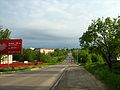

/content/images/947ada37_120px-Kolchugino-now2.jpg


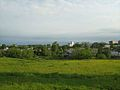

/content/images/a90c7e61_120px-Kolchugino-now5.jpg


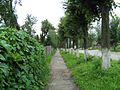

/content/images/120px-Kolchugino-now3.jpg


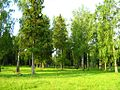

/content/images/120px-Kolchugino-now.jpg


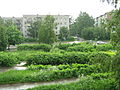

/content/images/120px-IQJb382OM48.jpg


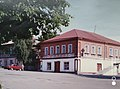

/content/images/83cdfde0_120px-Kolchugino-now.jpg


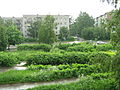

/content/images/e6e69c33_120px-IQJb382OM48.jpg


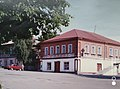

/content/images/120px-Kolchugino-now2.jpg


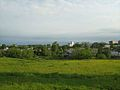

/content/images/fb53128c_90px-Kolchugino_Massovka.JPG


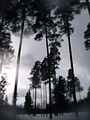

/content/images/90px-Kolchugino_Massovka.JPG


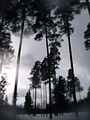

/content/images/120px-Kolchugino-now5.jpg


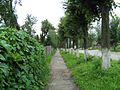

/content/images/.ipynb_checkpoints


ValueError: ignored

In [192]:
#Просматриваем картинки
from IPython.display import Image
from pathlib import Path
for fname in Path('/content/images').glob('*'):
    print(fname)
    display(Image(filename=fname))